In [1]:
# install the World Weather Online Historic Weather Library
import sys
!{sys.executable} -m pip install wwo-hist

In [2]:
import wwo_hist

In [3]:
key = "" # API key obtained from https://www.worldweatheronline.com/
locations = ["Calicut"] # list of strings containg Indian Zipcode, UK Postcode, IP address, Latitude/Longitude (decimal degree) or city name  
start = "01-JAN-2019" # date when desired scraping period starts; preferred date format: "dd-mmm-yyyy"
end = "01-JAN-2020" # date when desired scraping period ends; preferred date format: "dd-mmm-yyyy"
freq = 1 # frequency between observations; possible values 1 (1 hour), 3 (3 hours), 6 (6 hours), 12 (12 hours (day/night)) or 24 (daily averages)

In [4]:
# scrape the data
hist_weather_data = wwo_hist.retrieve_hist_data(
    api_key=key, 
    location_list=locations, 
    start_date=start, 
    end_date=end, 
    frequency=freq, 
    location_label = False, 
    export_csv = True, 
    store_df = True
)



Retrieving weather data for Calicut


Currently retrieving data for Calicut: from 2019-01-01 to 2019-01-31
Time elapsed (hh:mm:ss.ms) 0:00:03.622742
Currently retrieving data for Calicut: from 2019-02-01 to 2019-02-28
Time elapsed (hh:mm:ss.ms) 0:00:06.772112
Currently retrieving data for Calicut: from 2019-03-01 to 2019-03-31
Time elapsed (hh:mm:ss.ms) 0:00:10.081065
Currently retrieving data for Calicut: from 2019-04-01 to 2019-04-30
Time elapsed (hh:mm:ss.ms) 0:00:13.418430
Currently retrieving data for Calicut: from 2019-05-01 to 2019-05-31
Time elapsed (hh:mm:ss.ms) 0:00:17.110754
Currently retrieving data for Calicut: from 2019-06-01 to 2019-06-30
Time elapsed (hh:mm:ss.ms) 0:00:20.673838
Currently retrieving data for Calicut: from 2019-07-01 to 2019-07-31
Time elapsed (hh:mm:ss.ms) 0:00:24.360716
Currently retrieving data for Calicut: from 2019-08-01 to 2019-08-31
Time elapsed (hh:mm:ss.ms) 0:00:27.958610
Currently retrieving data for Calicut: from 2019-09-01 to 2019-09-30
Tim

In [5]:
# import necessary libraries for plotting and analysis
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

# call me basic, but I love this style
plt.style.use('ggplot')

In [6]:
# wwo_hist scrapes and saves the dataframe as a .csv file in the directory, read it as a pandas DataFrame with date-time as index
data = pd.read_csv('Calicut.csv', parse_dates=True, index_col=0)

In [7]:
data.head()

,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,moonrise,moonset,sunrise,sunset,...,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,location
date_time,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,31,23,0.0,11.6,7,26,02:34 AM,02:38 PM,06:46 AM,06:15 PM,...,6,60,76,0.2,1016,26,10,43,4,Calicut
2019-01-01 01:00:00,31,23,0.0,11.6,7,26,02:34 AM,02:38 PM,06:46 AM,06:15 PM,...,8,43,76,0.1,1016,25,10,59,5,Calicut
2019-01-01 02:00:00,31,23,0.0,11.6,7,26,02:34 AM,02:38 PM,06:46 AM,06:15 PM,...,9,26,76,0.0,1016,25,10,74,6,Calicut
2019-01-01 03:00:00,31,23,0.0,11.6,7,26,02:34 AM,02:38 PM,06:46 AM,06:15 PM,...,10,9,77,0.0,1016,25,10,89,6,Calicut
2019-01-01 04:00:00,31,23,0.0,11.6,7,26,02:34 AM,02:38 PM,06:46 AM,06:15 PM,...,11,11,75,0.0,1016,24,10,88,7,Calicut


In [8]:
# group the data by day to get maximum daily windspeed
grouped = data.groupby(pd.Grouper(freq = 'D'))
max_daily = grouped['windspeedKmph'].max()
max_daily_gust = grouped['WindGustKmph'].max()

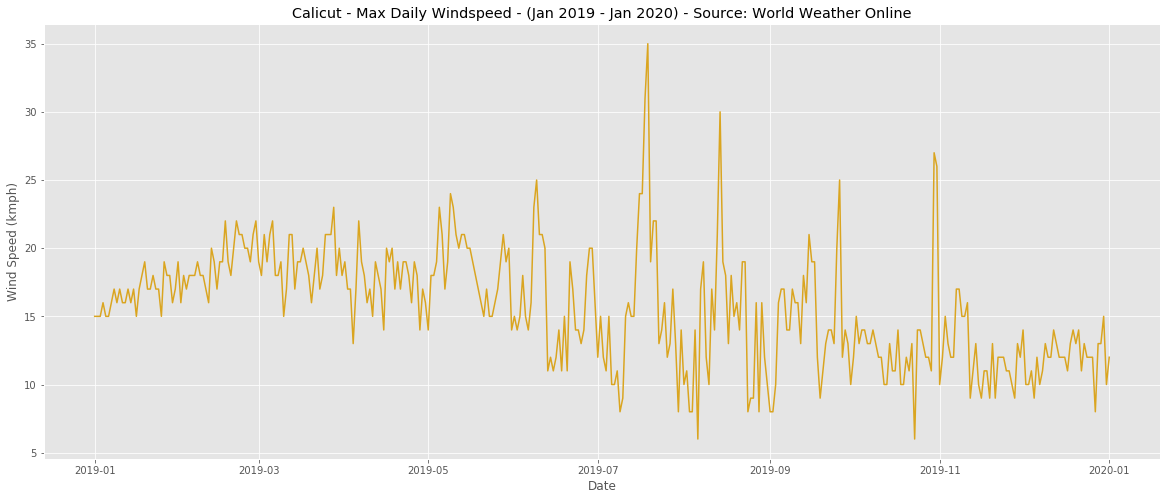

In [9]:
# plot using matplotlib
plt.figure(figsize = (20,8))
plt.title('Calicut - Max Daily Windspeed - (Jan 2019 - Jan 2020) - Source: World Weather Online')
plt.xlabel('Date')
plt.ylabel('Wind Speed (kmph)')
plt.plot(max_daily, color = 'goldenrod')

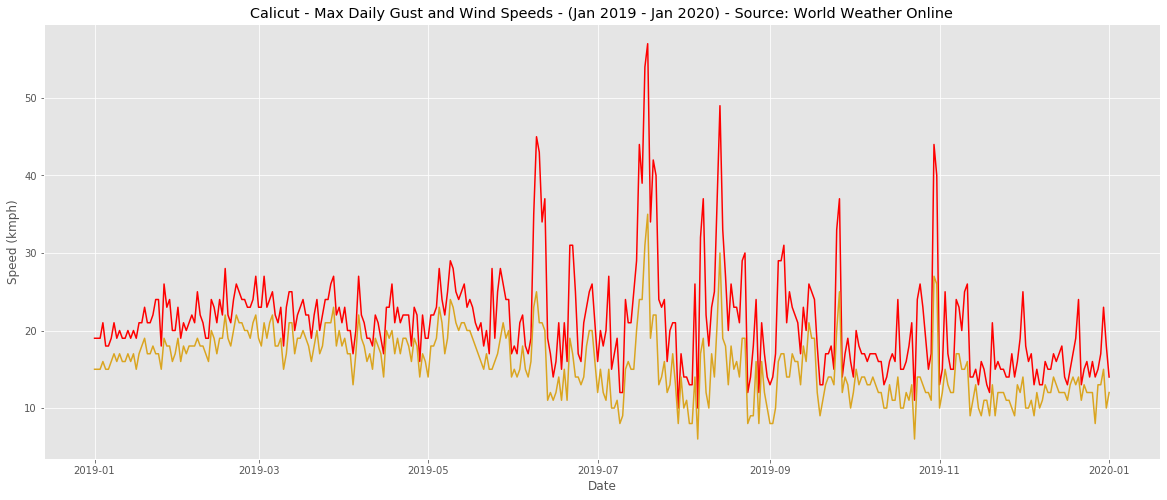

In [10]:
# plot using matplotlib
plt.figure(figsize = (20,8))
plt.title('Calicut - Max Daily Gust and Wind Speeds - (Jan 2019 - Jan 2020) - Source: World Weather Online')
plt.xlabel('Date')
plt.ylabel('Speed (kmph)')
plt.plot(max_daily_gust, color = 'red')
plt.plot(max_daily, color = 'goldenrod')

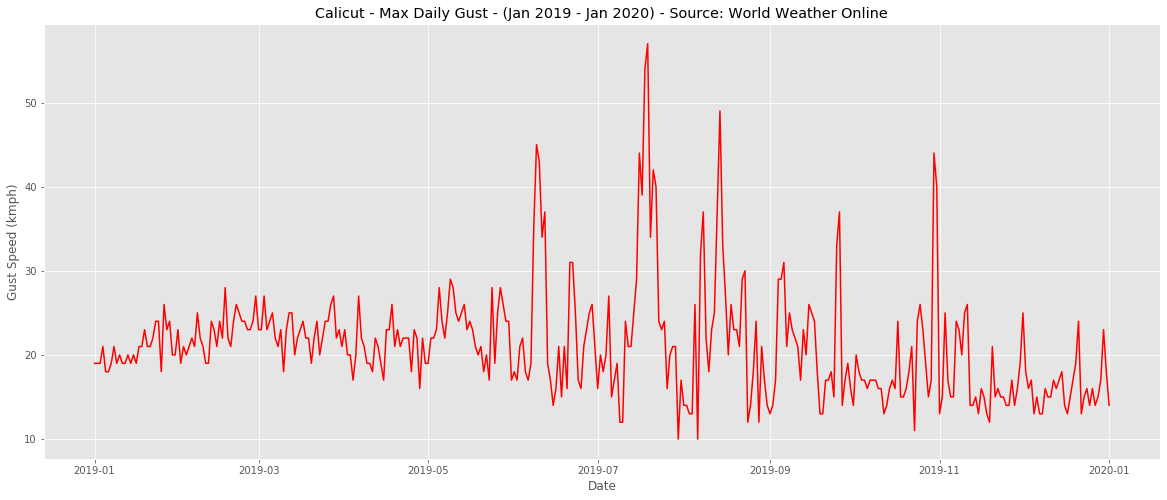

In [11]:
# plot using matplotlib
plt.figure(figsize = (20,8))
plt.title('Calicut - Max Daily Gust - (Jan 2019 - Jan 2020) - Source: World Weather Online')
plt.xlabel('Date')
plt.ylabel('Gust Speed (kmph)')
plt.plot(max_daily_gust, color = 'red')

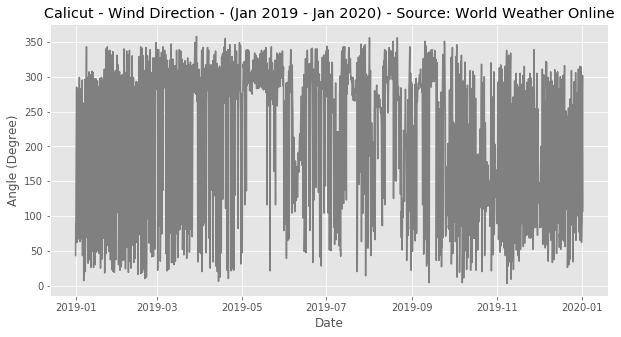

In [12]:
# plot using matplotlib
plt.figure(figsize = (10,5))
plt.title('Calicut - Wind Direction - (Jan 2019 - Jan 2020) - Source: World Weather Online')
plt.xlabel('Date')
plt.ylabel('Angle (Degree)')
plt.plot(data['winddirDegree'], color = 'grey')

In [13]:
import seaborn as sns

Text(0.5, 0, 'Wind Speeds')

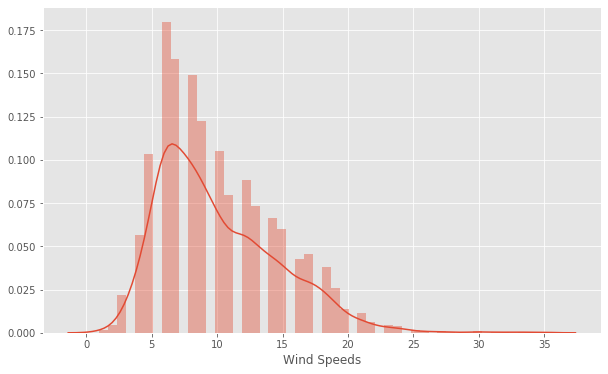

In [14]:
# probabilistic distribution
wind_speed = data['windspeedKmph']
wind_dir = data['winddirDegree']

plt.figure(figsize=(10,6))
sns.distplot(wind_speed)
plt.xlabel('Wind Speeds')

Text(0.5, 0, 'Wind Direction')

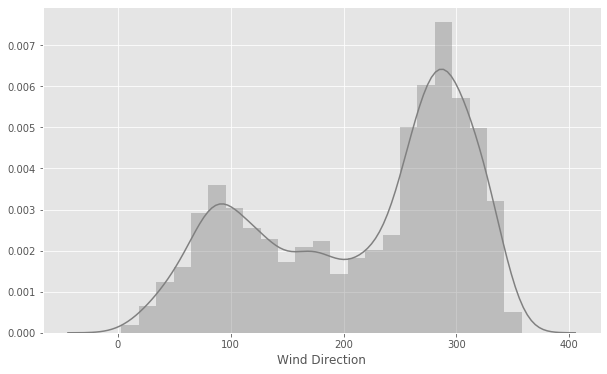

In [15]:
plt.figure(figsize=(10,6))
sns.distplot(wind_dir, color = 'grey')
plt.xlabel('Wind Direction')

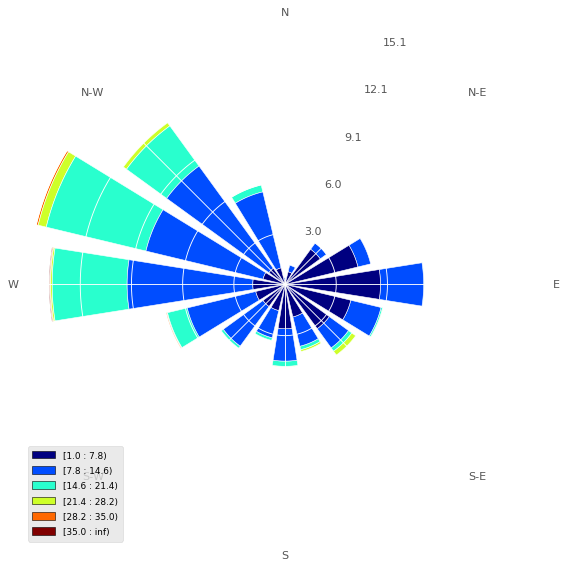

In [16]:
# Windrose
from windrose import WindroseAxes
import matplotlib.cm as cm
ax = WindroseAxes.from_ax()
ax.bar(wind_dir, wind_speed, normed=True, opening=0.8, edgecolor='white')
ax.set_legend()